# Obtención de insight

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Enero de 2025  
**Versión:** 1.0  

---

## Descripción

Este notebook presenta la obtención de insights a partir de un conjunto de datos

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas (2.2.2)
- numpy (1.26.4)
- matplotlib (3.8.0)
- seaborn (0.13.0)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRxmzwGve6qlUIgFj7bpvR64Fp1ILD5vEiLXg&s)

# Carga de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

# Carga de data

**Descripción.** Encuesta de preferencias alimentarias 2019

Esta Encuesta se realizó entre participantes de diferentes países y demografía.

In [2]:
!wget https://www.dropbox.com/s/ybszpwz4tk4mz6c/Food_Preference.csv

--2025-01-03 20:37:47--  https://www.dropbox.com/s/ybszpwz4tk4mz6c/Food_Preference.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/p8s27x3wzwopkt5jk7ezw/Food_Preference.csv?rlkey=hl1vzafu7ey7vm97piwollv78 [following]
--2025-01-03 20:37:47--  https://www.dropbox.com/scl/fi/p8s27x3wzwopkt5jk7ezw/Food_Preference.csv?rlkey=hl1vzafu7ey7vm97piwollv78
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc53242f125d75d0f5157a56f66b.dl.dropboxusercontent.com/cd/0/inline/ChglOABCIGzWCAI5xqQ5fLQqX9B9BlcxJltd_zNwCHcDvNT-LoYxLFrLXKlPfHC_wj2pt2F3UqgDKvdoYBlZPyXXcAyDFv2U3p1wrO5u0ZCOEKdbb6ux-20Z-sX1uVexW5z6GXpwG-GTRmHjYv0w1RSJ/file# [following]
--2025-01-03 20:37:47--  https://uc53242f125d75d0f5157a56f66b.dl.dropboxusercont

In [3]:
data_frame = pd.read_csv("Food_Preference.csv")
data_frame

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
0,2019/05/07 2:59:13 PM GMT+8,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe
1,2019/05/07 2:59:45 PM GMT+8,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes
2,2019/05/07 3:00:05 PM GMT+8,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe
3,2019/05/07 3:00:11 PM GMT+8,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe
4,2019/05/07 3:02:50 PM GMT+8,FPS005,Male,Indian,27,Traditional food,Fresh Juice,Maybe
...,...,...,...,...,...,...,...,...
283,2019/05/10 9:24:00 AM GMT+8,FPS284,Male,Indian,27,Western Food,Fresh Juice,Yes
284,2019/05/10 9:32:54 AM GMT+8,FPS285,Male,Indian,24,Traditional food,Fresh Juice,Yes
285,2019/05/10 12:09:17 PM GMT+8,FPS286,Male,Indian,25,Traditional food,Fresh Juice,Yes
286,2019/05/10 12:52:17 PM GMT+8,FPS287,Male,Indian,27,Traditional food,Fresh Juice,Yes


# Obtención de insights

## 1.Preferencias de comida según el género

**Insight:** ¿Existen diferencias significativas en las preferencias de comida entre hombres y mujeres?

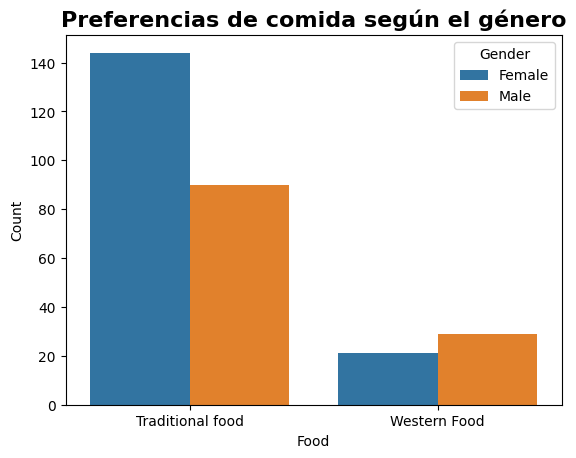

In [5]:
comida_genero = data_frame.groupby(['Gender', 'Food']).size().reset_index(name='Count')
sns.barplot(data=comida_genero, x='Food', y='Count', hue='Gender')
plt.title('Preferencias de comida según el género', fontsize=16, fontweight="bold")
plt.show()

## 2.Preferencias de jugo por edad

**Insight:** ¿Las preferencias de jugo cambian con la edad?

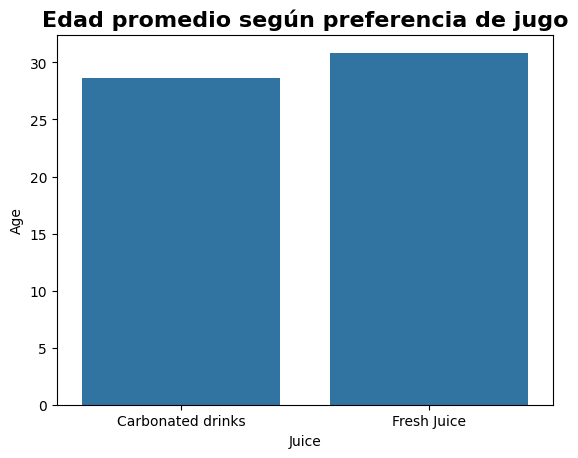

In [7]:
jugo_edad = data_frame.groupby('Juice')['Age'].mean().reset_index()
sns.barplot(data=jugo_edad, x='Juice', y='Age')
plt.title('Edad promedio según preferencia de jugo', fontsize=16, fontweight="bold")
plt.show()


## 3.Estado de petición de postre más popular por nacionalidad

**Insight:** ¿Qué alternativa de petición de postre es el más elegido en cada nacionalidad?

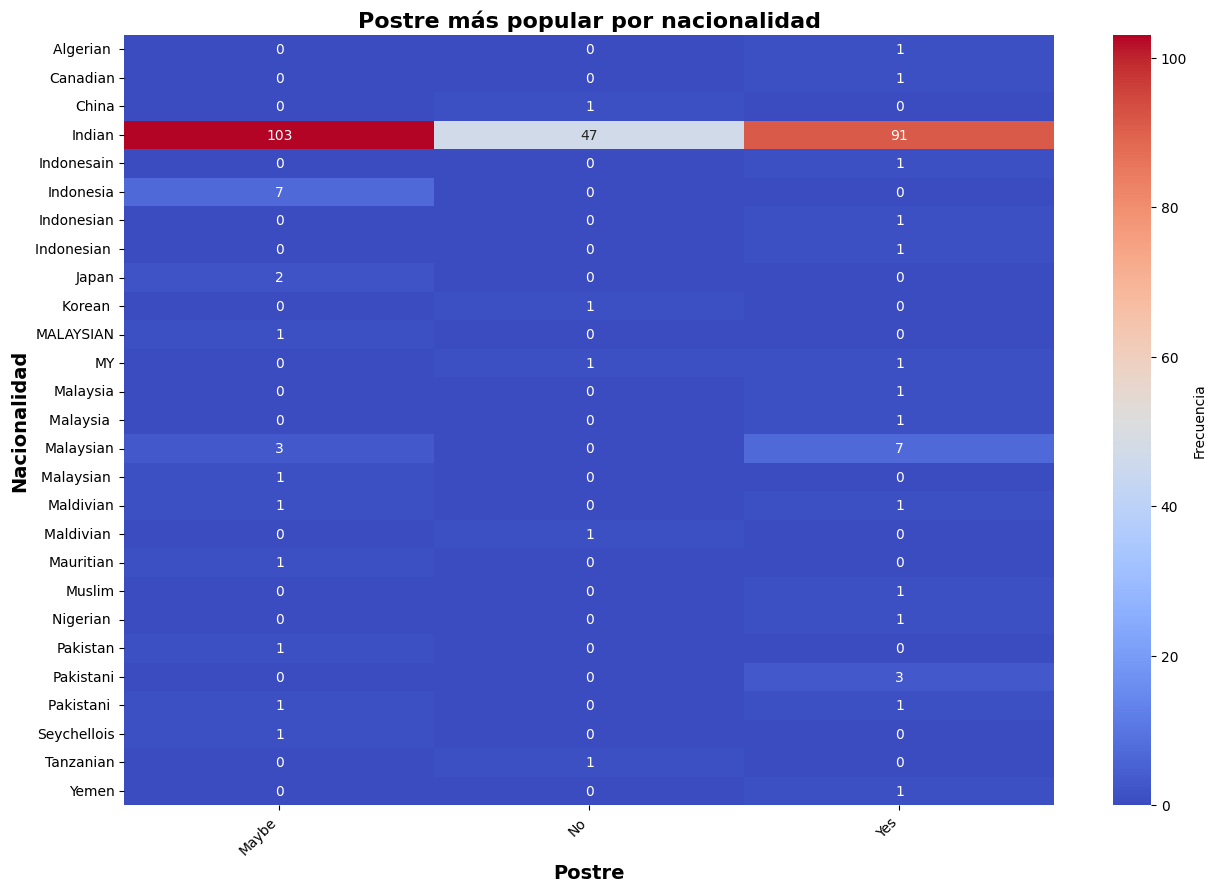

In [28]:
# Agrupar datos
postre_nacionalidad = data_frame.groupby(['Nationality', 'Dessert']).size().unstack(fill_value=0)

# Ajustar el tamaño de la figura
plt.figure(figsize=(15, 10))

# Crear el heatmap
sns.heatmap(
    postre_nacionalidad,
    annot=True,
    fmt='d',  # Formato de anotación a números enteros
    cmap='coolwarm',
    cbar_kws={'label': 'Frecuencia'}
)

# Configuración de título y etiquetas
plt.title('Petición de postre más popular por nacionalidad', fontsize=16, fontweight="bold")
plt.xlabel('Petición Postre', fontsize=14, fontweight="bold")
plt.ylabel('Nacionalidad', fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Mostrar gráfica
plt.show()


## 4.Distribución de la edad por género

**Insight:** ¿Hay diferencias en la distribución de la edad entre géneros?

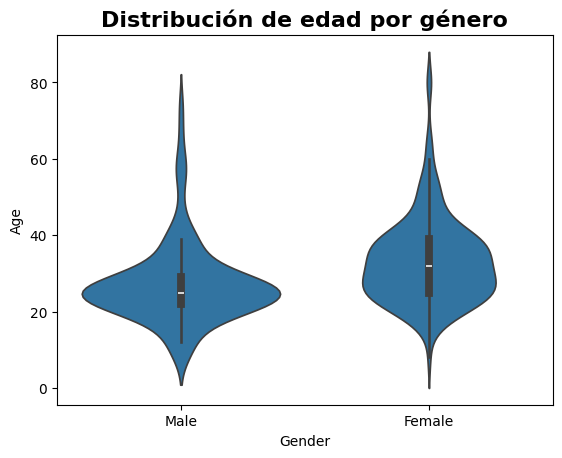

In [9]:
sns.violinplot(data=data_frame, x='Gender', y='Age')
plt.title('Distribución de edad por género', fontsize=16, fontweight="bold")
plt.show()

## 5.Relación entre edad y preferencias de comida

**Insight:** ¿Existe una relación entre la edad y las preferencias de comida?

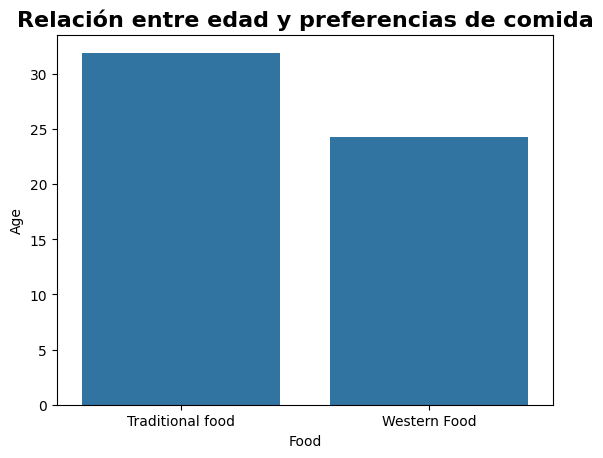

In [11]:
edad_comida = data_frame.groupby('Food')['Age'].mean().reset_index()
sns.barplot(data=edad_comida, x='Food', y='Age')
plt.title('Relación entre edad y preferencias de comida', fontsize=16, fontweight="bold")
plt.show()


## 6.Nacionalidad con mayor variedad de gustos

**Insight:** ¿Qué nacionalidad tiene las preferencias más diversas en alimentos?

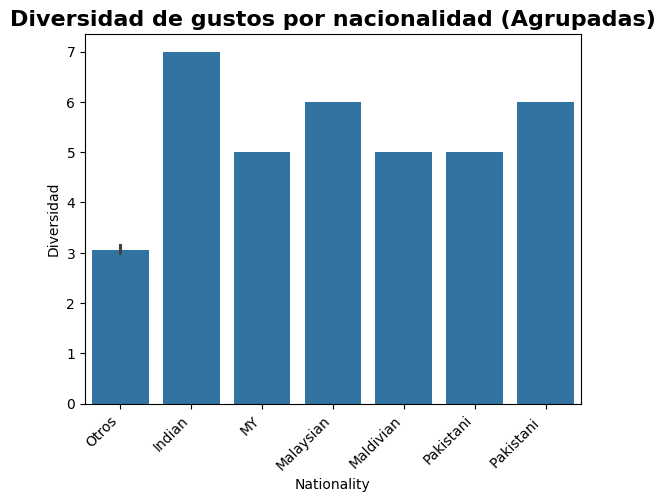

In [14]:
diversidad = data_frame.groupby('Nationality').nunique()[['Food', 'Juice', 'Dessert']].sum(axis=1).reset_index(name='Diversidad')
threshold = 5  # Número mínimo de registros para mantener una nacionalidad separada
diversidad['Nationality'] = diversidad['Nationality'].apply(lambda x: x if diversidad['Diversidad'][diversidad['Nationality'] == x].values[0] >= threshold else 'Otros')

sns.barplot(data=diversidad, x='Nationality', y='Diversidad')
plt.title('Diversidad de gustos por nacionalidad (Agrupadas)', fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha='right')
plt.show()


In [40]:
# Esta es otra alternativa, un gráfico interactivo
fig = px.bar(diversidad, x='Nationality', y='Diversidad', title='Diversidad de gustos por nacionalidad')
fig.show()

## 7.Asociación entre preferencias de comida y jugo

**Insight:** las personas que prefieren un tipo específico de comida tienden a elegir ciertos tipos de jugo.

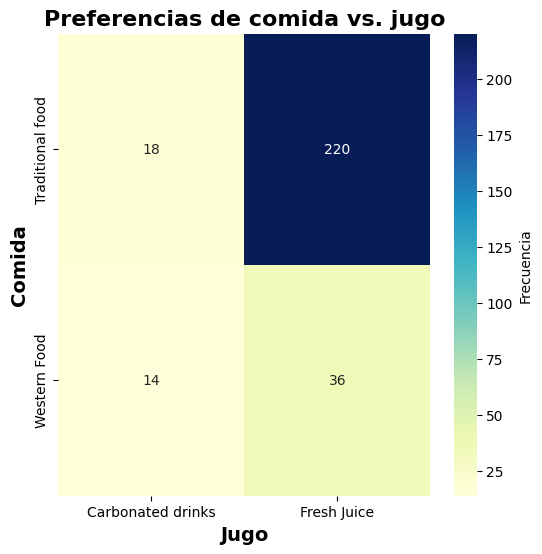

In [17]:
# Crear una tabla cruzada
jugo_comida = pd.crosstab(data_frame['Food'], data_frame['Juice'])

# Crear el heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(jugo_comida, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Frecuencia'})
plt.title('Preferencias de comida vs. jugo', fontsize=16, fontweight="bold")
plt.xlabel('Jugo', fontsize=14, fontweight="bold")
plt.ylabel('Comida', fontsize=14, fontweight="bold")
plt.show()


## 8.Relación entre edad y preferencia de petición de postre

**Insight:** la edad promedio varía según la petición de postre.

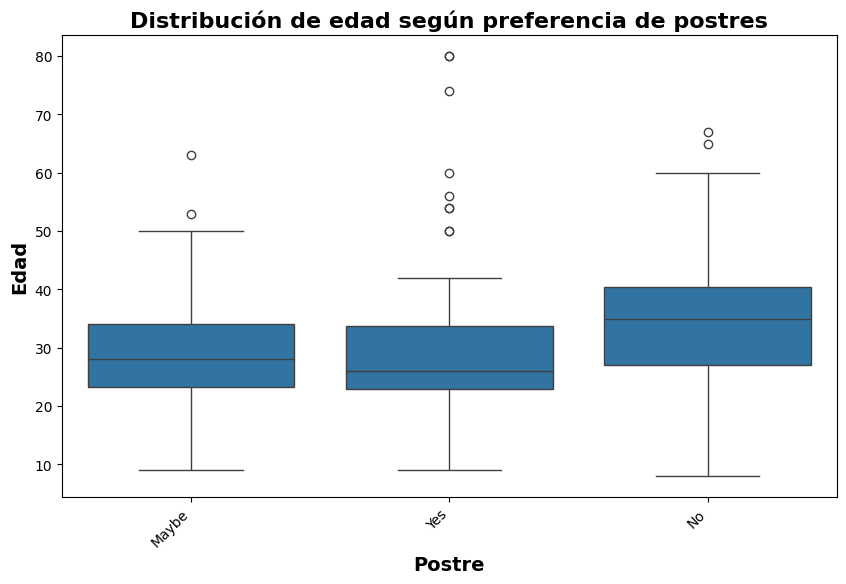

In [19]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_frame, x='Dessert', y='Age')
plt.title('Distribución de edad según preferencia de postres', fontsize=16, fontweight="bold")
plt.xlabel('Postre', fontsize=14, fontweight="bold")
plt.ylabel('Edad', fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha='right')
plt.show()


## 9.Influencia de la nacionalidad en la elección de jugos

**Insight:** ¿Las preferencias de jugo varían según la nacionalidad?

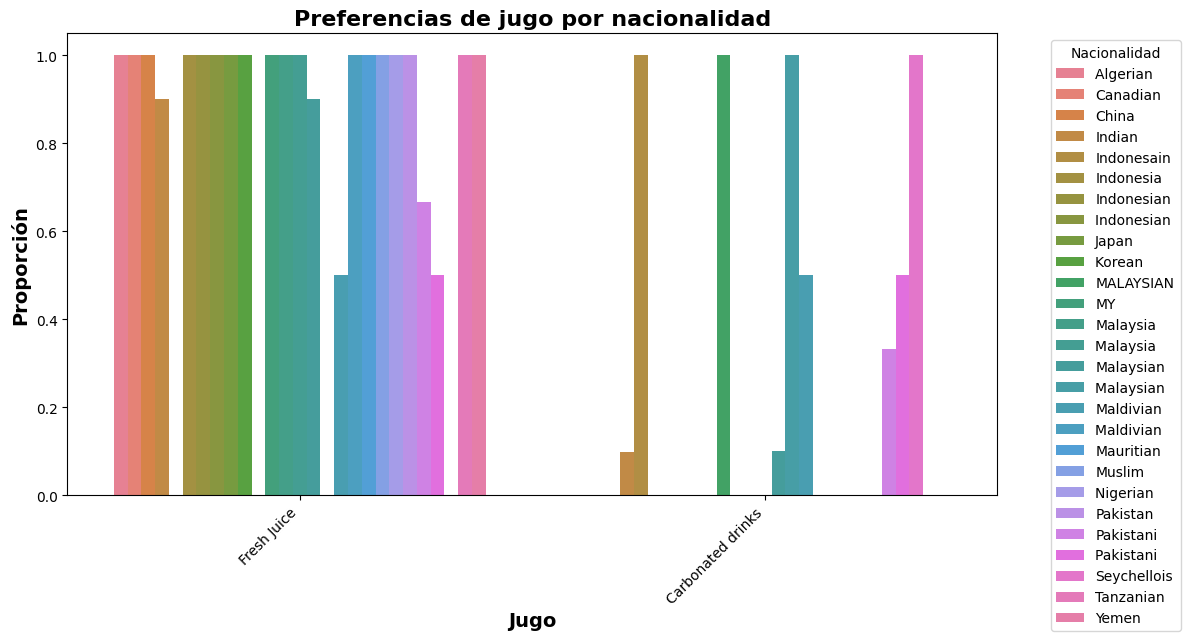

In [27]:
# Agrupar por Nationality y Juice, y calcular el tamaño de cada grupo
conteo_jugos = data_frame.groupby(['Nationality', 'Juice']).size().reset_index(name='total')

# Calcular el total por cada nacionalidad
totals = conteo_jugos.groupby('Nationality')['total'].transform('sum')

# Calcular la proporción
conteo_jugos['Proporcion'] = conteo_jugos['total'] / totals

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=conteo_jugos, x='Juice', y='Proporcion', hue='Nationality')
plt.title('Preferencias de jugo por nacionalidad', fontsize=16, fontweight="bold")
plt.xlabel('Jugo', fontsize=14, fontweight="bold")
plt.ylabel('Proporción', fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Nacionalidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

